In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [2]:
#Loading datasets
#read files
#Reading train file:
train = pd.read_csv('training_set_features.csv')
#Reading test file:
test = pd.read_csv('test_set_features.csv')

#Reading label file:
labels = pd.read_csv('training_set_labels.csv')



In [3]:
train


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
test


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [6]:
labels


,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [7]:
train = train.merge(labels, on='respondent_id', how='right')
train


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
train.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [11]:
#replace columns with mode
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace=True)

for column in test.columns:
    test[column].fillna(test[column].mode()[0], inplace=True)

In [12]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train.age_group = le.fit_transform(train.age_group)
train.education = le.fit_transform(train.education)
train.race = le.fit_transform(train.race)
train.sex = le.fit_transform(train.sex)
train.income_poverty = le.fit_transform(train.income_poverty)
train.marital_status = le.fit_transform(train.marital_status)
train.rent_or_own = le.fit_transform(train.rent_or_own)
train.employment_status = le.fit_transform(train.employment_status)
train.hhs_geo_region = le.fit_transform(train.hhs_geo_region)
train.census_msa = le.fit_transform(train.census_msa)
train.employment_industry = le.fit_transform(train.employment_industry)
train.employment_occupation = le.fit_transform(train.employment_occupation)

test.age_group = le.fit_transform(test.age_group)
test.education = le.fit_transform(test.education)
test.race = le.fit_transform(test.race)
test.sex = le.fit_transform(test.sex)
test.income_poverty = le.fit_transform(test.income_poverty)
test.marital_status = le.fit_transform(test.marital_status)
test.rent_or_own = le.fit_transform(test.rent_or_own)
test.employment_status = le.fit_transform(test.employment_status)
test.hhs_geo_region = le.fit_transform(test.hhs_geo_region)
test.census_msa = le.fit_transform(test.census_msa)
test.employment_industry = le.fit_transform(test.employment_industry)
test.employment_occupation = le.fit_transform(test.employment_occupation)

In [14]:
train

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,8,2,0.0,0.0,4,21,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0.0,0.0,12,19,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,9,0,2.0,0.0,14,21,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,5,1,0.0,0.0,4,21,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,9,0,1.0,0.0,18,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,1,9,2,0.0,0.0,4,21,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,6,1,1.0,0.0,4,2,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,6,0,0.0,0.0,4,21,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,5,2,1.0,0.0,4,6,0,0


<ipython-input-15-1cb3b84c18b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['xyz_vaccine'])


<Axes: xlabel='xyz_vaccine', ylabel='Density'>

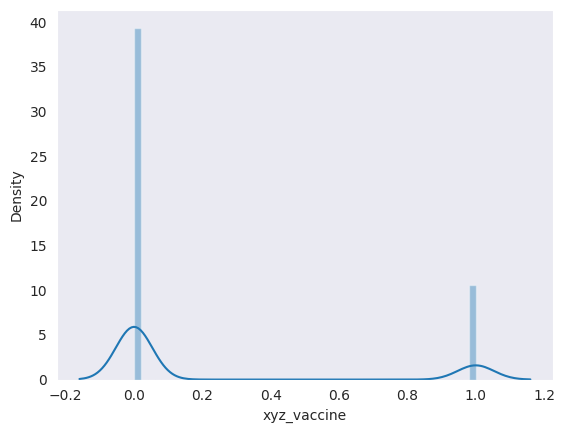

In [15]:
sns.distplot(train['xyz_vaccine'])

<ipython-input-16-557cb92876de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['seasonal_vaccine'])


<Axes: xlabel='seasonal_vaccine', ylabel='Density'>

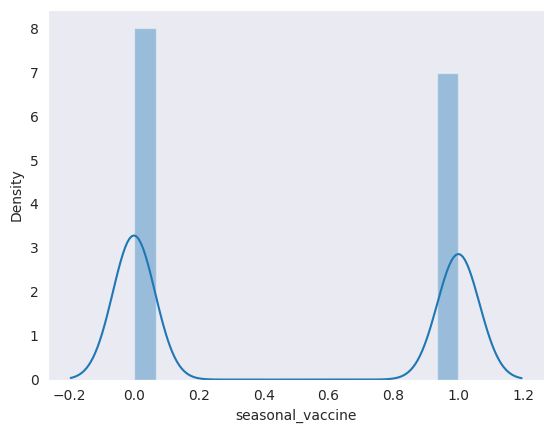

In [16]:

sns.distplot(train['seasonal_vaccine'])

In [17]:

from collections import Counter

print(Counter(train.xyz_vaccine))

Counter({0: 21033, 1: 5674})


In [18]:
from collections import Counter

print(Counter(train.seasonal_vaccine))

Counter({0: 14272, 1: 12435})


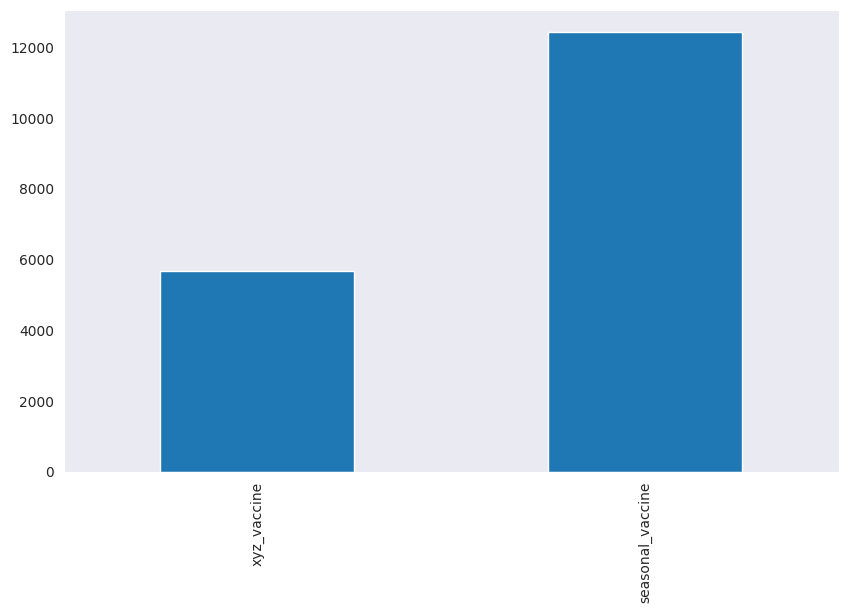

In [19]:
# ab binary way m krna h
target = ['xyz_vaccine', 'seasonal_vaccine']
y_data = train[target]

# Plotting the data
plt.figure(figsize=(10,6))
y_data.sum(axis=0).plot.bar()
plt.show()


In [20]:
#x , y and x_test
y=train[target]
X = train.drop(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], axis = 1)
X_test=test.drop(['respondent_id'], axis = 1)

y.shape, X.shape, X_test.shape

((26707, 2), (26707, 35), (26708, 35))

In [21]:
#splitting training
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.10, stratify=y, shuffle=True)
#hape check
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((24036, 35), (2671, 35), (24036, 2), (2671, 2))

In [22]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

<ipython-input-24-4548a4f54bde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val.xyz_vaccine);


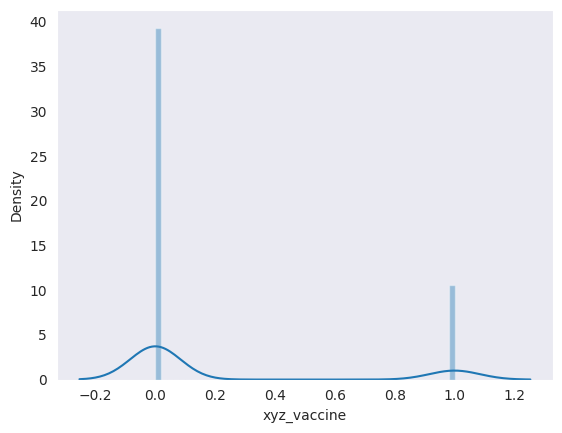

In [24]:
sns.distplot(y_val.xyz_vaccine);

<ipython-input-25-aafecd29d059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val.seasonal_vaccine)


<Axes: xlabel='seasonal_vaccine', ylabel='Density'>

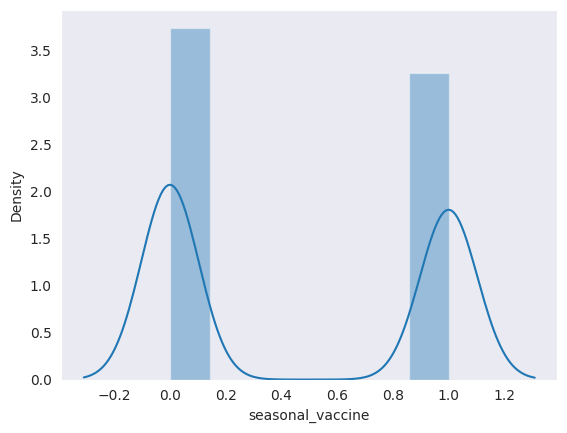

In [25]:

sns.distplot(y_val.seasonal_vaccine)

In [26]:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=1, max_iter=300)
models = MultiOutputClassifier(model)


In [27]:

models.fit(X_train, y_train)
print(models.score(X_train, y_train))


0.7299467465468464


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:

y_pred = models.predict(X_val)
print(models.score(X_val, y_val))
y_pred


0.6548109322351179


array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 1]])

In [29]:

from sklearn import metrics

my_metrics = metrics.classification_report( y_val, y_pred)
print(my_metrics)

              precision    recall  f1-score   support

           0       0.65      0.44      0.53       568
           1       0.77      0.69      0.73      1244

   micro avg       0.74      0.61      0.67      1812
   macro avg       0.71      0.56      0.63      1812
weighted avg       0.73      0.61      0.66      1812
 samples avg       0.32      0.31      0.31      1812



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_val, y_pred))


0.7212590454633441


In [32]:

df=pd.DataFrame({'Reall_xyz': y_val.xyz_vaccine, 'Reall_seasonal': y_val.seasonal_vaccine, 'xyz': y_pred[:,0], 'seasonal': y_pred[:,0]})
df

,Reall_xyz,Reall_seasonal,xyz,seasonal
24326,0,0,0,0
18384,1,1,1,1
2337,0,0,0,0
9725,1,1,1,1
4606,1,1,1,1
...,...,...,...,...
17371,1,1,0,0
534,1,1,1,1
22283,0,0,0,0
263,1,1,0,0


In [33]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.44      0.53       568
           1       0.77      0.69      0.73      1244

   micro avg       0.74      0.61      0.67      1812
   macro avg       0.71      0.56      0.63      1812
weighted avg       0.73      0.61      0.66      1812
 samples avg       0.32      0.31      0.31      1812

0.6548109322351179


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
predict = models.predict(X_test)
predict

array([[0, 0],
       [0, 0],
       [0, 1],
       ...,
       [0, 0],
       [0, 0],
       [1, 1]])

In [36]:

proba = models.predict_proba(X_test)
proba = np.asarray(proba)
proba

array([[[0.91672502, 0.08327498],
        [0.97766974, 0.02233026],
        [0.51586927, 0.48413073],
        ...,
        [0.81377713, 0.18622287],
        [0.99436064, 0.00563936],
        [0.08457019, 0.91542981]],

       [[0.83528545, 0.16471455],
        [0.99837819, 0.00162181],
        [0.18141785, 0.81858215],
        ...,
        [0.6959325 , 0.3040675 ],
        [0.67663735, 0.32336265],
        [0.19311004, 0.80688996]]])

In [37]:

proba[0,:]

array([[0.91672502, 0.08327498],
       [0.97766974, 0.02233026],
       [0.51586927, 0.48413073],
       ...,
       [0.81377713, 0.18622287],
       [0.99436064, 0.00563936],
       [0.08457019, 0.91542981]])

In [38]:

proba[0,:][:,1]


array([0.08327498, 0.02233026, 0.48413073, ..., 0.18622287, 0.00563936,
       0.91542981])

In [39]:
proba[1,:][:,1]


array([0.16471455, 0.00162181, 0.81858215, ..., 0.3040675 , 0.32336265,
       0.80688996])

In [40]:
df_vaccine = pd.DataFrame(proba[0,:][:,1], proba[1,:][:,1])
df_vaccine.reset_index(inplace=True)
df_vaccine.columns = ["xyz_vaccine", "seasonal_vaccine"]
df_vaccine

,xyz_vaccine,seasonal_vaccine
0,0.164715,0.083275
1,0.001622,0.022330
2,0.818582,0.484131
3,0.867069,0.577085
4,0.546202,0.334338
...,...,...
26703,0.632174,0.182296
26704,0.009066,0.044510
26705,0.304067,0.186223
26706,0.323363,0.005639


In [41]:
final = pd.DataFrame({'respondent_id': test.respondent_id, 'xyz_vaccine': df_vaccine.xyz_vaccine,'seasonal_vaccine':df_vaccine.seasonal_vaccine})
final

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.164715,0.083275
1,26708,0.001622,0.022330
2,26709,0.818582,0.484131
3,26710,0.867069,0.577085
4,26711,0.546202,0.334338
...,...,...,...
26703,53410,0.632174,0.182296
26704,53411,0.009066,0.044510
26705,53412,0.304067,0.186223
26706,53413,0.323363,0.005639


In [44]:
final.to_csv('submission.csv', index=False)
print("yeyeye saved!")

yeyeye saved!


In [45]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
submission = pd.read_csv("submission.csv")
submission

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.164715,0.083275
1,26708,0.001622,0.022330
2,26709,0.818582,0.484131
3,26710,0.867069,0.577085
4,26711,0.546202,0.334338
...,...,...,...
26703,53410,0.632174,0.182296
26704,53411,0.009066,0.044510
26705,53412,0.304067,0.186223
26706,53413,0.323363,0.005639
